# Data Cleaning and EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception

In [4]:
test_ear = plt.imread('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/effusion_test/AM156L.jpg')

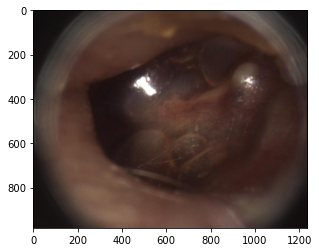

In [5]:
plt.imshow(test_ear);

In [7]:
train_gen = ImageDataGenerator(rescale = 1/255., validation_split=0.2)

In [8]:
train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

Found 252 images belonging to 3 classes.


In [9]:
validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', batch_size = 32, subset = 'validation' )

Found 61 images belonging to 3 classes.


## Basic Model

In [57]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [58]:
history = model.fit(train_data, epochs = 20, validation_data = validation_data,
    batch_size = 32)

Epoch 1/20
8/8 [==============================] - 5s 588ms/step - loss: 58.3907 - accuracy: 0.3865 - val_loss: 30.9875 - val_accuracy: 0.3934
Epoch 2/20
8/8 [==============================] - 4s 441ms/step - loss: 25.2814 - accuracy: 0.4024 - val_loss: 13.1248 - val_accuracy: 0.4098
Epoch 3/20
8/8 [==============================] - 4s 467ms/step - loss: 16.6978 - accuracy: 0.4343 - val_loss: 5.0853 - val_accuracy: 0.6557
Epoch 4/20
8/8 [==============================] - 4s 452ms/step - loss: 9.2058 - accuracy: 0.6255 - val_loss: 18.0258 - val_accuracy: 0.3115
Epoch 5/20
8/8 [==============================] - 3s 435ms/step - loss: 11.3506 - accuracy: 0.5697 - val_loss: 4.4627 - val_accuracy: 0.7377
Epoch 6/20
8/8 [==============================] - 4s 451ms/step - loss: 6.8882 - accuracy: 0.6255 - val_loss: 5.4603 - val_accuracy: 0.6393
Epoch 7/20
8/8 [==============================] - 3s 439ms/step - loss: 5.4241 - accuracy: 0.6813 - val_loss: 2.3282 - val_accuracy: 0.8197
Epoch 8/20
8/

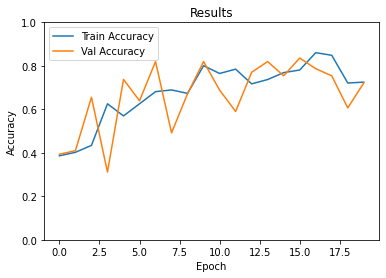

In [60]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

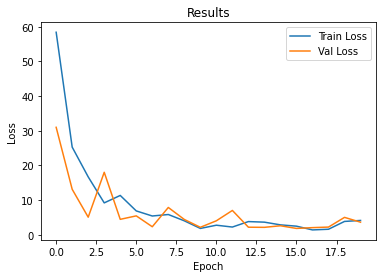

In [62]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 1: Adding Epochs

In [67]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(3, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
history1 = model1.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 576ms/step - loss: 100.9300 - accuracy: 0.3108 - val_loss: 51.8302 - val_accuracy: 0.3934
Epoch 2/100
8/8 [==============================] - 4s 467ms/step - loss: 46.5447 - accuracy: 0.3386 - val_loss: 26.1313 - val_accuracy: 0.3934
Epoch 3/100
8/8 [==============================] - 4s 453ms/step - loss: 30.0947 - accuracy: 0.4183 - val_loss: 25.5399 - val_accuracy: 0.3934
Epoch 4/100
8/8 [==============================] - 3s 432ms/step - loss: 21.5806 - accuracy: 0.5219 - val_loss: 6.2143 - val_accuracy: 0.6393
Epoch 5/100
8/8 [==============================] - 4s 445ms/step - loss: 10.6387 - accuracy: 0.6056 - val_loss: 8.7971 - val_accuracy: 0.4590
Epoch 6/100
8/8 [==============================] - 3s 442ms/step - loss: 6.0536 - accuracy: 0.6534 - val_loss: 4.0189 - val_accuracy: 0.7049
Epoch 7/100
8/8 [==============================] - 4s 457ms/step - loss: 4.7343 - accuracy: 0.6853 - val_loss: 5.2432 - val_accuracy: 0.5738
Epoc

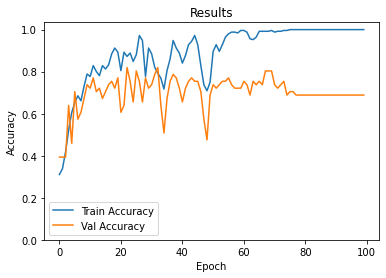

In [69]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

overfit try less epochs

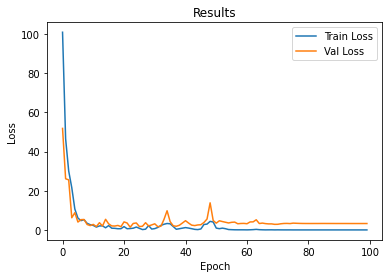

In [70]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 2: Adding Layers 

In [49]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(3, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
history2 = model2.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 553ms/step - loss: 17.5389 - accuracy: 0.2976 - val_loss: 9.2005 - val_accuracy: 0.3934
Epoch 2/100
8/8 [==============================] - 4s 447ms/step - loss: 5.9424 - accuracy: 0.4127 - val_loss: 2.3355 - val_accuracy: 0.6230
Epoch 3/100
8/8 [==============================] - 3s 440ms/step - loss: 2.3436 - accuracy: 0.5754 - val_loss: 2.4423 - val_accuracy: 0.4918
Epoch 4/100
8/8 [==============================] - 3s 437ms/step - loss: 2.6592 - accuracy: 0.5317 - val_loss: 1.8732 - val_accuracy: 0.6230
Epoch 5/100
8/8 [==============================] - 3s 436ms/step - loss: 2.0384 - accuracy: 0.6071 - val_loss: 1.5042 - val_accuracy: 0.6230
Epoch 6/100
8/8 [==============================] - 4s 451ms/step - loss: 1.1228 - accuracy: 0.7024 - val_loss: 2.5150 - val_accuracy: 0.4590
Epoch 7/100
8/8 [==============================] - 4s 460ms/step - loss: 1.9223 - accuracy: 0.5833 - val_loss: 2.7449 - val_accuracy: 0.5738
Epoch 8/100


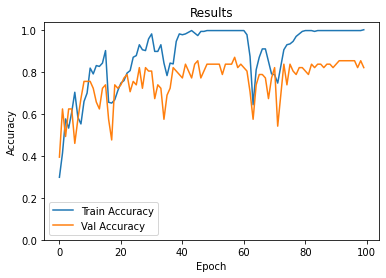

In [51]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

still overfit but less than model 1, will try early stopping

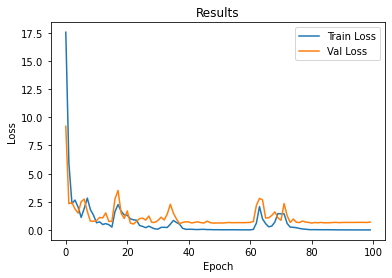

In [52]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 3: Changing Layers and Using Early Stopping 

In [15]:
early_stop = EarlyStopping(patience = 5)

In [48]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [96]:
history3 = model3.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
8/8 [==============================] - 5s 641ms/step - loss: 51.6483 - accuracy: 0.4104 - val_loss: 10.7261 - val_accuracy: 0.3607
Epoch 2/80
8/8 [==============================] - 3s 424ms/step - loss: 16.4546 - accuracy: 0.4024 - val_loss: 6.9172 - val_accuracy: 0.5574
Epoch 3/80
8/8 [==============================] - 3s 436ms/step - loss: 10.3646 - accuracy: 0.5498 - val_loss: 2.9979 - val_accuracy: 0.6557
Epoch 4/80
8/8 [==============================] - 3s 417ms/step - loss: 8.2659 - accuracy: 0.5498 - val_loss: 4.5782 - val_accuracy: 0.5738
Epoch 5/80
8/8 [==============================] - 3s 418ms/step - loss: 6.9112 - accuracy: 0.5896 - val_loss: 1.6602 - val_accuracy: 0.7869
Epoch 6/80
8/8 [==============================] - 3s 434ms/step - loss: 2.9608 - accuracy: 0.7331 - val_loss: 3.1414 - val_accuracy: 0.6557
Epoch 7/80
8/8 [==============================] - 3s 407ms/step - loss: 5.7655 - accuracy: 0.5657 - val_loss: 2.5480 - val_accuracy: 0.6721
Epoch 8/80
8/8 [

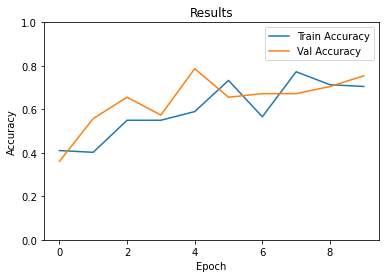

In [97]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

Model Improving, not as overfit will look at dropout now 

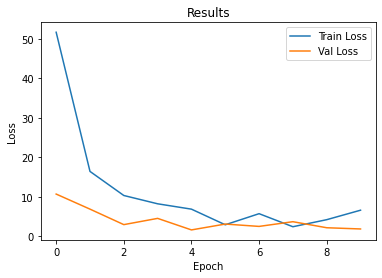

In [99]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 4: Changing Layers and Dropout

In [45]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(3, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
history4 = model4.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 6s 748ms/step - loss: 36.6803 - accuracy: 0.3413 - val_loss: 3.5663 - val_accuracy: 0.3443
Epoch 2/80
8/8 [==============================] - 4s 453ms/step - loss: 15.2519 - accuracy: 0.4048 - val_loss: 3.1149 - val_accuracy: 0.4262
Epoch 3/80
8/8 [==============================] - 3s 418ms/step - loss: 13.4180 - accuracy: 0.3849 - val_loss: 1.6735 - val_accuracy: 0.5574
Epoch 4/80
8/8 [==============================] - 4s 452ms/step - loss: 7.8021 - accuracy: 0.4762 - val_loss: 1.0761 - val_accuracy: 0.7049
Epoch 5/80
8/8 [==============================] - 4s 502ms/step - loss: 4.6205 - accuracy: 0.6032 - val_loss: 0.9470 - val_accuracy: 0.7869
Epoch 6/80
8/8 [==============================] - 3s 417ms/step - loss: 3.3538 - accuracy: 0.5437 - val_loss: 1.4308 - val_accuracy: 0.5902
Epoch 7/80
8/8 [==============================] - 4s 456ms/step - loss: 3.6143 - accuracy: 0.4563 - val_loss: 1.7414 - val_accuracy: 0.4098
Epoch 8/80
8/8 [=

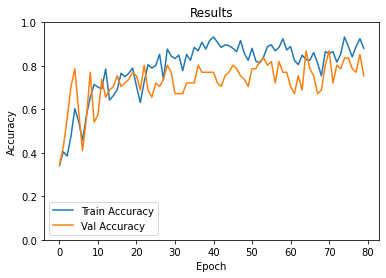

In [47]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

trend following closely with train and validation data

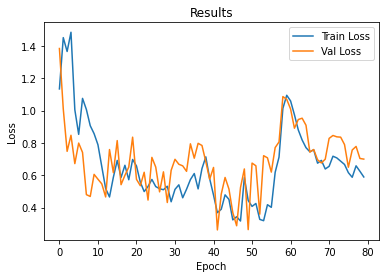

In [177]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 5: Kernal Regularizer with Dropout

In [185]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(3, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [186]:
history5 = model5.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 4s 522ms/step - loss: 51.4717 - accuracy: 0.3307 - val_loss: 45.1111 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 3s 419ms/step - loss: 43.2927 - accuracy: 0.3506 - val_loss: 5.3995 - val_accuracy: 0.4098
Epoch 3/80
8/8 [==============================] - 3s 436ms/step - loss: 18.2692 - accuracy: 0.4861 - val_loss: 14.9252 - val_accuracy: 0.4098
Epoch 4/80
8/8 [==============================] - 3s 413ms/step - loss: 16.5860 - accuracy: 0.4263 - val_loss: 3.6764 - val_accuracy: 0.5246
Epoch 5/80
8/8 [==============================] - 3s 414ms/step - loss: 11.5868 - accuracy: 0.5020 - val_loss: 5.2267 - val_accuracy: 0.4918
Epoch 6/80
8/8 [==============================] - 3s 434ms/step - loss: 8.3042 - accuracy: 0.5936 - val_loss: 1.2731 - val_accuracy: 0.8197
Epoch 7/80
8/8 [==============================] - 3s 433ms/step - loss: 4.3397 - accuracy: 0.6056 - val_loss: 1.2397 - val_accuracy: 0.7869
Epoch 8/80
8/

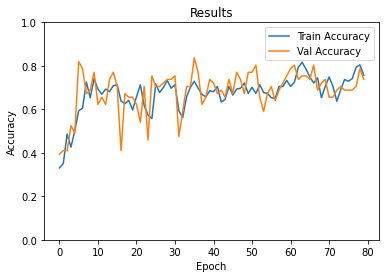

In [187]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

not much improvement with kernal regularizer 

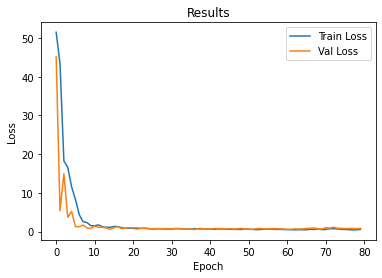

In [188]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 6: Adding Convolutional Operation

In [207]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(Dense(50, activation = 'relu'))
model6.add(Dense(3, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [208]:
history6 = model6.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32,callbacks=[early_stop] )

Epoch 1/80
8/8 [==============================] - 8s 803ms/step - loss: 55.3464 - accuracy: 0.3625 - val_loss: 24.4076 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 6s 713ms/step - loss: 21.2681 - accuracy: 0.4343 - val_loss: 6.1987 - val_accuracy: 0.3279
Epoch 3/80
8/8 [==============================] - 6s 755ms/step - loss: 14.1390 - accuracy: 0.4741 - val_loss: 1.7330 - val_accuracy: 0.5574
Epoch 4/80
8/8 [==============================] - 6s 805ms/step - loss: 7.4806 - accuracy: 0.4781 - val_loss: 1.2511 - val_accuracy: 0.6557
Epoch 5/80
8/8 [==============================] - 6s 793ms/step - loss: 4.9704 - accuracy: 0.5299 - val_loss: 2.0598 - val_accuracy: 0.3279
Epoch 6/80
8/8 [==============================] - 6s 667ms/step - loss: 2.2624 - accuracy: 0.6135 - val_loss: 0.6421 - val_accuracy: 0.7377
Epoch 7/80
8/8 [==============================] - 6s 684ms/step - loss: 1.7816 - accuracy: 0.6494 - val_loss: 1.0923 - val_accuracy: 0.7213
Epoch 8/80
8/8 [

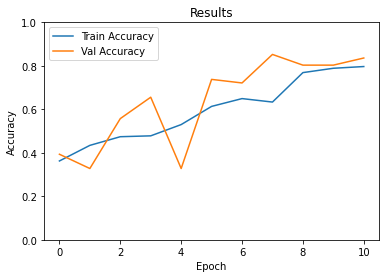

In [209]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

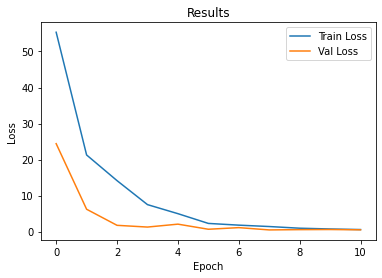

In [210]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 7: Convolutional Operation and Max Pooling

In [66]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.1))
#model7.add(Dense(50, activation = 'relu'))
model7.add(Dense(3, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [67]:
history7 = model7.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32,callbacks=[early_stop] )

Epoch 1/80
8/8 [==============================] - 8s 831ms/step - loss: 15.8859 - accuracy: 0.3810 - val_loss: 3.7710 - val_accuracy: 0.3934
Epoch 2/80
8/8 [==============================] - 4s 548ms/step - loss: 5.3592 - accuracy: 0.4683 - val_loss: 2.3133 - val_accuracy: 0.4262
Epoch 3/80
8/8 [==============================] - 4s 549ms/step - loss: 1.5406 - accuracy: 0.5794 - val_loss: 0.5143 - val_accuracy: 0.7705
Epoch 4/80
8/8 [==============================] - 4s 546ms/step - loss: 0.8171 - accuracy: 0.7579 - val_loss: 0.5840 - val_accuracy: 0.7541
Epoch 5/80
8/8 [==============================] - 4s 562ms/step - loss: 0.5851 - accuracy: 0.8492 - val_loss: 0.4668 - val_accuracy: 0.8525
Epoch 6/80
8/8 [==============================] - 4s 551ms/step - loss: 0.4435 - accuracy: 0.8889 - val_loss: 0.4793 - val_accuracy: 0.9016
Epoch 7/80
8/8 [==============================] - 4s 554ms/step - loss: 0.3442 - accuracy: 0.8810 - val_loss: 0.3373 - val_accuracy: 0.8852
Epoch 8/80
8/8 [===

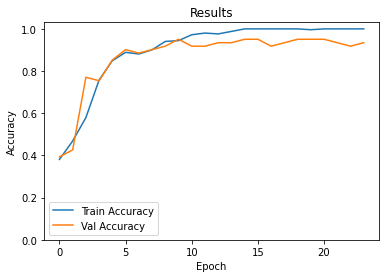

In [68]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

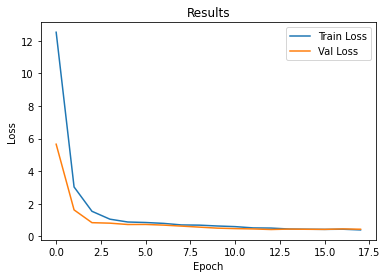

In [59]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

In [108]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [149]:
test_gen = ImageDataGenerator(rescale = 1/255.)

In [151]:
test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/')

Found 159 images belonging to 3 classes.


In [158]:
preds = model7.predict(test_data) >.5

In [163]:
np.argmax(preds.astype(int), axis = 0)

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [165]:
test_data_values = test_data.labels 

In [166]:
test_data_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int32)

In [167]:
x_test_binarized = to_categorical(test_data_values)

In [ ]:
model7.evaluate()

In [146]:
path = "/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/tube_test/AM85R.jpg"

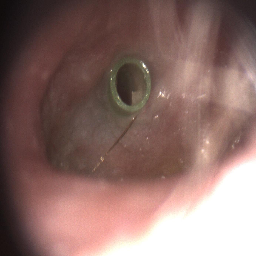

In [147]:
test = image.load_img(path, target_size=(256, 256))
test

In [148]:
model7.predict(np.asarray(test).reshape(1, 256, 256, 3))

array([[0., 0., 1.]], dtype=float32)

## Model 8: Adding Prebuilt Networks InceptionV3

In [53]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                  validation_split=0.2)

In [54]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

Found 252 images belonging to 3 classes.


In [55]:
valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

Found 61 images belonging to 3 classes.


In [69]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [70]:
preds = conv_base.predict(train_aug)

In [71]:
preds_val = conv_base.predict(valid_aug)

In [82]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.1))
#model8.add(Dense(50, activation = 'relu'))
model8.add(Dense(3, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [83]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [84]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_val, y_valid_binarized),
    batch_size = 100)

Epoch 1/30
3/3 [==============================] - 1s 113ms/step - loss: 37.7755 - accuracy: 0.3571 - val_loss: 22.1967 - val_accuracy: 0.3934
Epoch 2/30
3/3 [==============================] - 0s 67ms/step - loss: 14.8071 - accuracy: 0.4246 - val_loss: 2.6272 - val_accuracy: 0.2951
Epoch 3/30
3/3 [==============================] - 0s 65ms/step - loss: 1.6502 - accuracy: 0.3929 - val_loss: 1.2248 - val_accuracy: 0.3934
Epoch 4/30
3/3 [==============================] - 0s 65ms/step - loss: 0.9250 - accuracy: 0.4921 - val_loss: 1.0869 - val_accuracy: 0.4426
Epoch 5/30
3/3 [==============================] - 0s 69ms/step - loss: 0.9502 - accuracy: 0.5159 - val_loss: 1.0994 - val_accuracy: 0.3770
Epoch 6/30
3/3 [==============================] - 0s 70ms/step - loss: 0.8349 - accuracy: 0.5397 - val_loss: 1.2408 - val_accuracy: 0.3279
Epoch 7/30
3/3 [==============================] - 0s 61ms/step - loss: 0.8072 - accuracy: 0.5357 - val_loss: 1.2152 - val_accuracy: 0.3770
Epoch 8/30
3/3 [=======

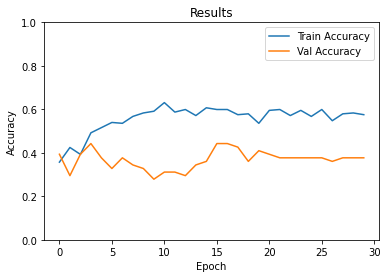

In [85]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

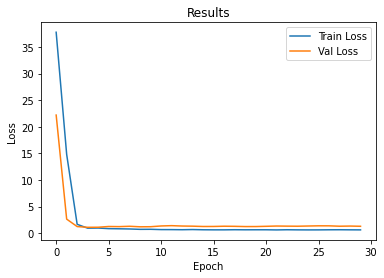

In [86]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 9: Adding Prebuilt Networks Xception

In [87]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

In [88]:
preds9 = conv_base9.predict(train_aug)

In [89]:
preds_val9 = conv_base9.predict(valid_aug)

In [94]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.1))
model9.add(Dense(50, activation = 'relu'))
model9.add(Dense(3, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [95]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [96]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_val9, y_valid_binarized),
    batch_size = 100, callbacks=[early_stop])

Epoch 1/30
3/3 [==============================] - 1s 104ms/step - loss: 1.1724 - accuracy: 0.3492 - val_loss: 1.1101 - val_accuracy: 0.3443
Epoch 2/30
3/3 [==============================] - 0s 38ms/step - loss: 1.0493 - accuracy: 0.4524 - val_loss: 1.1065 - val_accuracy: 0.3770
Epoch 3/30
3/3 [==============================] - 0s 39ms/step - loss: 0.9927 - accuracy: 0.5556 - val_loss: 1.1486 - val_accuracy: 0.3607
Epoch 4/30
3/3 [==============================] - 0s 38ms/step - loss: 0.9571 - accuracy: 0.5595 - val_loss: 1.1937 - val_accuracy: 0.2787
Epoch 5/30
3/3 [==============================] - 0s 39ms/step - loss: 0.9213 - accuracy: 0.5754 - val_loss: 1.2140 - val_accuracy: 0.2787
Epoch 6/30
3/3 [==============================] - 0s 37ms/step - loss: 0.8564 - accuracy: 0.6190 - val_loss: 1.2353 - val_accuracy: 0.2951
Epoch 7/30
3/3 [==============================] - 0s 36ms/step - loss: 0.8210 - accuracy: 0.6667 - val_loss: 1.2709 - val_accuracy: 0.2951


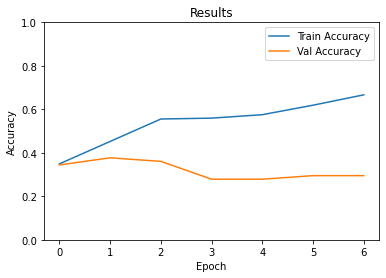

In [97]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

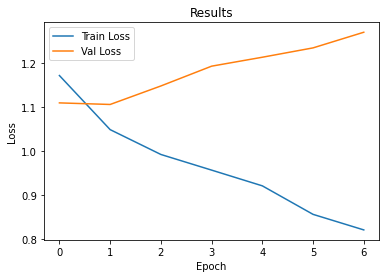

In [98]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 10: Adding Prebuilt Networks VGG16

In [108]:
conv_base10 = VGG16(include_top=False, input_shape = (150, 150, 3))

In [109]:
preds10 = conv_base10.predict(train_aug)

In [110]:
preds_val10 = conv_base10.predict(valid_aug)

In [111]:
model10 = Sequential()
model10.add(GlobalAveragePooling2D())
model10.add(Dense(100, activation = 'relu'))
model10.add(Dropout(0.1))
model10.add(Dense(50, activation = 'relu'))
model10.add(Dense(3, activation = 'softmax'))

model10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [112]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [115]:
history10 = model10.fit(preds10, y_train_binarized, epochs = 100, validation_data = (preds_val10, y_valid_binarized),
    batch_size = 30)

Epoch 1/100
9/9 [==============================] - 0s 9ms/step - loss: 0.9207 - accuracy: 0.5437 - val_loss: 1.1216 - val_accuracy: 0.3443
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9423 - accuracy: 0.5794 - val_loss: 1.1417 - val_accuracy: 0.3607
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9395 - accuracy: 0.5357 - val_loss: 1.1678 - val_accuracy: 0.3279
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9388 - accuracy: 0.5357 - val_loss: 1.1647 - val_accuracy: 0.4262
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9501 - accuracy: 0.5357 - val_loss: 1.1691 - val_accuracy: 0.3443
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9672 - accuracy: 0.4802 - val_loss: 1.1523 - val_accuracy: 0.2951
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.9327 - accuracy: 0.5397 - val_loss: 1.1968 - val_accuracy: 0.2951
Epoch 8/100
9/9 [==========

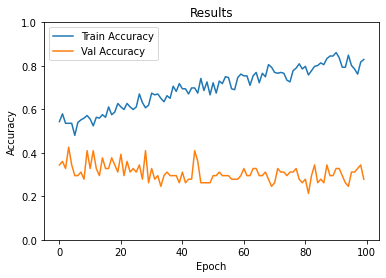

In [116]:
plt.plot(history10.history['accuracy'], label='Train Accuracy')
plt.plot(history10.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

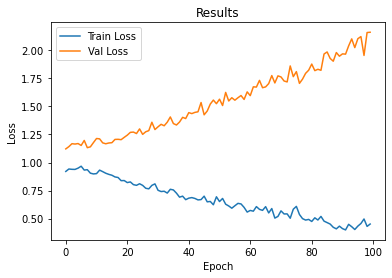

In [117]:
plt.plot(history10.history['loss'], label = 'Train Loss')
plt.plot(history10.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');

## Model 11: Adding Prebuilt Networks MobileNetV2

In [119]:
conv_base11 = MobileNetV2(include_top=False, input_shape = (150, 150, 3))

9412608/9406464 [==============================] - 1s 0us/step


In [120]:
preds11 = conv_base11.predict(train_aug)

In [121]:
preds_val11 = conv_base11.predict(valid_aug)

In [122]:
model11 = Sequential()
model11.add(GlobalAveragePooling2D())
model11.add(Dense(100, activation = 'relu'))
model11.add(Dropout(0.1))
model11.add(Dense(50, activation = 'relu'))
model11.add(Dense(3, activation = 'softmax'))

model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [123]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [124]:
history11 = model11.fit(preds11, y_train_binarized, epochs = 100, validation_data = (preds_val11, y_valid_binarized),
    batch_size = 30)

Epoch 1/100
9/9 [==============================] - 0s 19ms/step - loss: 1.1671 - accuracy: 0.3492 - val_loss: 1.0584 - val_accuracy: 0.4098
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.0356 - accuracy: 0.4325 - val_loss: 1.0251 - val_accuracy: 0.4754
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.9642 - accuracy: 0.5556 - val_loss: 1.0385 - val_accuracy: 0.3934
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.9295 - accuracy: 0.5516 - val_loss: 1.0327 - val_accuracy: 0.4098
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.8751 - accuracy: 0.5833 - val_loss: 1.0385 - val_accuracy: 0.4098
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8023 - accuracy: 0.6508 - val_loss: 1.0562 - val_accuracy: 0.4754
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7346 - accuracy: 0.7341 - val_loss: 1.1041 - val_accuracy: 0.4590
Epoch 8/100
9/9 [=========

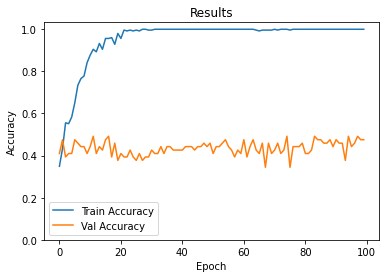

In [125]:
plt.plot(history11.history['accuracy'], label='Train Accuracy')
plt.plot(history11.history['val_accuracy'], label = 'Val Accuracy')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results');

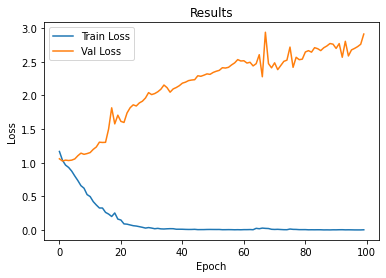

In [126]:
plt.plot(history11.history['loss'], label = 'Train Loss')
plt.plot(history11.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Results');